In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 

val_raw = pd.read_csv("../../temp_data/temp_val.csv")
val_raw.head()

,sessionID,item_id,action_type,market,reward
0,0_33749,20529632,view_item,qa,0.0
1,0_33749,a8d6308a-be66-4140-982caf0d9308b685,click_inspiration,qa,2.0
2,0_33749,a5a00142-a2d8-4c88-8af61486f4110d24,click_inspiration,qa,2.0
3,0_33749,00529671,view_item,qa,0.0
4,0_33749,80534372,view_item,qa,0.0


In [3]:
example = val_raw[:4].copy()

In [4]:
row = example.iloc[-1:,:]
to_process = pd.concat([example, row, example.iloc[-2:-1,:],example.iloc[-2:-1,:],   row, row, row, row, example.iloc[-2:-1,:]], axis=0)
to_process.iloc[:3,0] = "0_1"
to_process.iloc[7,1] = "19473570"
to_process.loc[to_process.action_type=="view_item", "reward"] = 0.2
to_process

,sessionID,item_id,action_type,market,reward
0,0_1,20529632,view_item,qa,0.2
1,0_1,a8d6308a-be66-4140-982caf0d9308b685,click_inspiration,qa,2.0
2,0_1,a5a00142-a2d8-4c88-8af61486f4110d24,click_inspiration,qa,2.0
3,0_33749,00529671,view_item,qa,0.2
3,0_33749,00529671,view_item,qa,0.2
2,0_33749,a5a00142-a2d8-4c88-8af61486f4110d24,click_inspiration,qa,2.0
2,0_33749,a5a00142-a2d8-4c88-8af61486f4110d24,click_inspiration,qa,2.0
3,0_33749,19473570,view_item,qa,0.2
3,0_33749,00529671,view_item,qa,0.2
3,0_33749,00529671,view_item,qa,0.2


In [5]:
from recommenders.ikea.data_utils.preprocessing import add_reward_simple
act_dict = {"click_inspiration":2, "select_content":2, "add_to_wishlist":1, "add_to_cart":2, "purchase":2}

copy = val_raw.iloc[:1000000,:].copy()
copy = add_reward_simple(copy, action_to_rew_dict=act_dict)

In [6]:
from recommenders.ikea.data_utils.preprocessing import preprocess_train_data
from recommenders.utils.tokenizer import Tokenizer

input_tok = Tokenizer.from_file("../../data/IKEA/tokenizers/input_tokenizer.json")
output_tok = Tokenizer.from_file("../../data/IKEA/tokenizers/output_tokenizer.json")
merket_tok = "../../data/IKEA/tokenizers/market_tokenizer.json"

In [7]:
from more_itertools import chunked


all_sess = list(copy.sessionID.unique())

chunk_size = round(len(all_sess) / 10)  # Calculate the chunk size

# Loop over session in 10 chunks
total=0
final = pd.DataFrame()
for chunk in chunked(all_sess, chunk_size):

    total+= len(chunk)
    
    # Process the chunk
    data = copy[copy.sessionID.isin(chunk)].copy()

    data = preprocess_train_data(dir=data, 
                      padding_id=input_tok.pad_idx, 
                      state_len=10, 
                      tokenizer_market=merket_tok, 
                      tokenizer_input=input_tok, 
                      tokenizer_output=output_tok,
                      pad_pos="end",
                      reward_name="reward",
                      session_id_name="sessionID",
                      action_name="item_id",
                      parallel=False,
                      progress_bar=False,
                      future_steps_next_state="all")
    
    # Concat to full df
    final = pd.concat([final, data], axis=0)

    del data

    
assert len(all_sess)==total

In [15]:
val_processed = preprocess_train_data(dir=copy, 
                      padding_id=input_tok.pad_idx, 
                      state_len=10, 
                      tokenizer_market=merket_tok, 
                      tokenizer_input=input_tok, 
                      tokenizer_output=output_tok,
                      pad_pos="end",
                      reward_name="reward",
                      session_id_name="sessionID",
                      action_name="item_id",
                      parallel=False,
                      progress_bar=False,
                      future_steps_next_state="all")

In [30]:
for i,lis in enumerate(val_processed.state.values):
    res = (lis == final.state.values[i]).all()
    if not res: 
        print("wrong")

In [190]:
val_raw[(val_raw.sessionID=="0_2125")&(val_raw.action_type=="click_inspiration")].index

Int64Index([108, 109, 110, 111, 151], dtype='int64')

In [196]:
copy[(copy.sessionID=="0_2125")].loc[108:152]

,sessionID,item_id,action_type,market,reward
108,0_2125,ee1cf79a-2de5-4fe1-90a505e844f13943,click_inspiration,bh,2.0
109,0_2125,af6f51f4-ae49-4068-83bfe69e92d9d364,click_inspiration,bh,2.0
110,0_2125,e5859efe-234d-494e-8ed3e6020b8819a5,click_inspiration,bh,2.0
111,0_2125,0b7d7950-f1fd-40df-86bb529976be8d80,click_inspiration,bh,2.0
112,0_2125,60282186,view_item,bh,0.0
113,0_2125,80430591,view_item,bh,0.0
114,0_2125,60282186,view_item,bh,0.0
115,0_2125,10221685,view_item,bh,0.0
116,0_2125,60282186,view_item,bh,0.0
117,0_2125,20320312,view_item,bh,0.0


In [20]:
val_processed.loc[108:152]

,state,action,r_act,next_state,true_state_len,true_next_state_len,is_end
108,"[27666, 80866, 37623, 37623, 53258, 53258, 666...",9266,2.0,"[80866, 37623, 37623, 53258, 53258, 66647, 123...",10,10,False
109,"[80866, 37623, 37623, 53258, 53258, 66647, 123...",3619,2.0,"[37623, 37623, 53258, 53258, 66647, 123583, 54...",10,10,False
110,"[37623, 37623, 53258, 53258, 66647, 123583, 54...",2131,2.0,"[37623, 53258, 53258, 66647, 123583, 54019, 63...",10,10,False
111,"[37623, 53258, 53258, 66647, 123583, 54019, 63...",8143,2.0,"[53258, 53258, 66647, 123583, 54019, 63802, 62...",10,10,False
151,"[46359, 109579, 109579, 109579, 109579, 109579...",7625,2.0,"[109579, 109579, 109579, 109579, 109579, 74867...",10,10,True


In [193]:
import numpy as np
val_processed.state.apply(lambda state: np.count_nonzero(state==input_tok.pad_idx))

1         9
2         8
108       0
109       0
110       0
         ..
149951    0
149952    0
149953    0
149954    0
149975    2
Name: state, Length: 14512, dtype: int64

In [153]:
print(input_tok.stoi("00529671"))
print(output_tok.stoi("ee1cf79a-2de5-4fe1-90a505e844f13943"))
print(output_tok.itos(8439))
print(output_tok.stoi("a8d6308a-be66-4140-982caf0d9308b685"))
# PASST!

34374
9266
a8d6308a-be66-4140-982caf0d9308b685
8439


In [18]:
val_processed

,state,action,r_act,next_state,true_state_len,true_next_state_len,is_end
1,"[7550, 127420, 127420, 127420, 127420, 127420,...",8439,4.0,"[7550, 13432, 50711, 127420, 127420, 127420, 1...",1,3,False
2,"[7550, 13432, 127420, 127420, 127420, 127420, ...",1611,2.0,"[7550, 13432, 50711, 34374, 127420, 127420, 12...",2,4,True
108,"[27666, 80866, 37623, 37623, 53258, 53258, 666...",9266,4.0,"[37623, 37623, 53258, 53258, 66647, 123583, 54...",10,10,False
109,"[80866, 37623, 37623, 53258, 53258, 66647, 123...",3619,4.0,"[37623, 53258, 53258, 66647, 123583, 54019, 63...",10,10,False
110,"[37623, 37623, 53258, 53258, 66647, 123583, 54...",2131,4.0,"[53258, 53258, 66647, 123583, 54019, 63802, 62...",10,10,False
...,...,...,...,...,...,...,...
999945,"[36882, 23124, 43737, 23124, 85760, 23124, 368...",1647,2.0,"[43737, 23124, 85760, 23124, 36882, 8273, 9839...",10,10,True
999964,"[123548, 27979, 113282, 123548, 60373, 113282,...",2636,2.0,"[27979, 113282, 123548, 60373, 113282, 61722, ...",9,10,True
999982,"[16529, 116269, 114223, 24394, 114223, 16529, ...",6864,2.0,"[16529, 116269, 114223, 24394, 114223, 16529, ...",8,10,True
999994,"[39555, 73607, 39555, 127420, 127420, 127420, ...",9321,2.0,"[39555, 73607, 39555, 30906, 127420, 127420, 1...",3,4,True


In [116]:
from recommenders.ikea.data_utils.preprocessing import get_cum_rew

to_process.groupby("sessionID", group_keys=False).apply(get_cum_rew, future_steps_next_state=2, reward_name="reward")

,sessionID,item_id,action_type,market,reward
0,0_1,20529632,view_item,qa,1.2
1,0_1,a8d6308a-be66-4140-982caf0d9308b685,click_inspiration,qa,2.0
2,0_1,a5a00142-a2d8-4c88-8af61486f4110d24,click_inspiration,qa,1.0
0,0_33749,00529671,view_item,qa,0.4
1,0_33749,00529671,view_item,qa,1.2
2,0_33749,a5a00142-a2d8-4c88-8af61486f4110d24,click_inspiration,qa,2.0
3,0_33749,a5a00142-a2d8-4c88-8af61486f4110d24,click_inspiration,qa,1.2
4,0_33749,19473570,view_item,qa,0.4
5,0_33749,00529671,view_item,qa,0.4
6,0_33749,00529671,view_item,qa,0.4


In [5]:
# Check the buffer 
import pandas as pd
replay_df = pd.read_json("../../temp_data/replay_buffer_val_SL10_2.json", orient="records", lines=True)

In [6]:
replay_df.r_act.value_counts(normalize=True)

2    0.547578
4    0.442753
3    0.009669
Name: r_act, dtype: float64

In [7]:
replay_df.r_act.mean()

2.8951756492844427

<AxesSubplot: ylabel='Frequency'>

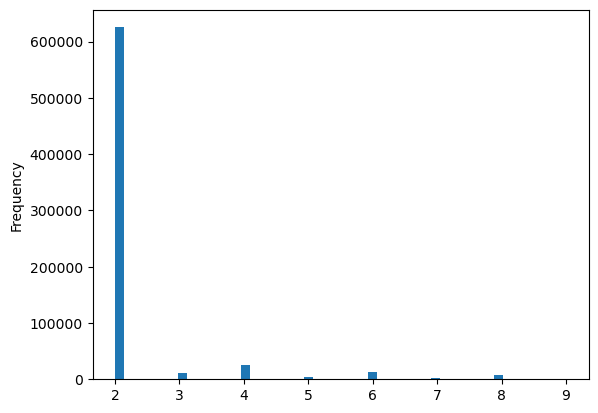

In [3]:
replay_df[replay_df.r_act<10].r_act.plot(kind="hist", bins=50)

In [11]:
import numpy as np 
print(np.mean([0.2909, 0.2909, 0.2905, 0.2904]))
print(np.std([0.2909, 0.2909, 0.2905, 0.2904]))

0.290675
0.0002277608394786098


In [12]:
0.290675 + 0.000223

0.290898

In [13]:
print(np.mean([0.29, 0.2898, 0.2897, 0.2895]))
print(np.std([0.29, 0.2898, 0.2897, 0.2895]))

0.28974999999999995
0.00018027756377319887
